In [0]:
!pip install kaggle

In [0]:
#이거하기 전에 먼저 cd / 이용해서 경로 설정해주고 실행하면 그 경로에 파일이 다운받아짐

from google.colab import files
files.upload()
#json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Permission Warning 이 일어나지 않도록
!chmod 600 ~/.kaggle/kaggle.json
#json 파일 제대로 업로드 됐는지 확인
!ls -1ha kaggle.json
#본인이 참가한 모든 대회 보기
!kaggle competitions list

Saving kaggle.json to kaggle.json
kaggle.json
ref                                                                deadline             category             reward  teamCount  userHasEntered  
-----------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                                                   2030-01-01 00:00:00  Getting Started   Knowledge       2246           False  
titanic                                                            2030-01-01 00:00:00  Getting Started   Knowledge      16526           False  
house-prices-advanced-regression-techniques                        2030-01-01 00:00:00  Getting Started   Knowledge       4571           False  
connectx                                                           2030-01-01 00:00:00  Getting Started   Knowledge        360           False  
competitive-data-science-predict-future-sales                      2020-12-31 23:59:

In [0]:
! kaggle competitions download -c tobigs13nn

  0% 0.00/3.01M [00:00<?, ?B/s]
100% 3.01M/3.01M [00:00<00:00, 97.8MB/s]
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 154MB/s]
 73% 5.00M/6.84M [00:00<00:00, 20.3MB/s]
100% 6.84M/6.84M [00:00<00:00, 22.8MB/s]


In [0]:
!ls

drive	     sample_data	    test_df.csv.zip
kaggle.json  sample_submission.csv  train_df.csv.zip


In [0]:
#압축 풀어주기
! unzip test_df.csv.zip
! unzip train_df.csv.zip

Archive:  test_df.csv.zip
  inflating: test_df.csv             
Archive:  train_df.csv.zip
  inflating: train_df.csv            


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

드라이브에 저장해두고 불러오기(코랩 실행할 때마다 압축풀고 저장할순없음)

In [0]:
cd /content/drive/My Drive/Colab Notebooks/kaggle_dataset

/content/drive/My Drive/Colab Notebooks/kaggle_dataset


In [0]:
ls -ltr

total 102582
-rw------- 1 root root   158651 Mar 13 04:02 sample_submission.csv
-rw------- 1 root root 31527613 Mar 13 04:02 test_df.csv
-rw------- 1 root root 73356919 Mar 13 04:03 train_df.csv


In [0]:
# 데이터 로드
import numpy as np
import pandas as pd

sample_submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")

In [0]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


코랩 텐서플로우는 2.0이 디폴트가 아니라서 이렇게 다운을 받아줘야함

In [0]:
!pip install tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 45kB/s 
     |████████████████████████████████| 501kB 38.8MB/s 
     |████████████████████████████████| 4.3MB 35.2MB/s 


In [0]:
print(f"Train data shape {train.shape}")
print(f"Test data shape {test.shape}")

Train data shape (42000, 785)
Test data shape (18000, 785)


# 데이터 전처리

In [0]:
X = train.iloc[:,1:].values
#뒤에 values 걸어주는 이유가 뭔가? #array로 쓰기 위해서
y = train.iloc[:,0].values

In [0]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
y

array([7, 8, 7, ..., 9, 4, 3])

In [0]:
X_test = test.iloc[:,1:].values

In [0]:
#데이터 스케일링
X = X / 255
X_test = X_test / 255

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#train, valid set 분리
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=2020)

In [0]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


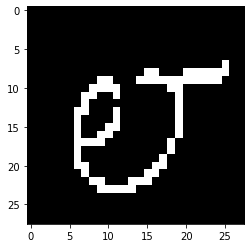

In [0]:
#어떻게 생겨먹은 데이터인지 한번 찍어보기
import matplotlib.pyplot as plt
idx = 784
plt.imshow(x_train[idx].reshape(28, 28), cmap="gray")

In [0]:
#텐서플로우 로드
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [0]:
#leaky relu도 써보기
num_classes = 10
weight_init = tf.keras.initializers.he_uniform() #he initialization
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, input_shape=(784,), activation="relu", kernel_initializer=weight_init), #Dense 안에 옵션으로 활성함수 relu 지정
  tf.keras.layers.BatchNormalization(), #레이어마다 layers.BatchNormalization() 추가해줌 #layers.Dropout(버리는비율) 추가해줌
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation="relu", kernel_initializer=weight_init),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation="relu", kernel_initializer=weight_init),
  tf.keras.layers.Dense(num_classes, activation="softmax"),
])

In [0]:
optimizer = tf.keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer, metrics =['accuracy'])
#model.compile에서 옵티마이저와 loss를 구분지어줌
#원핫인코딩했으면 loss를 categorical_....으로 하면 되고 안했으면 sparse_cate...로 해주면 된다

In [0]:
model.summary()
#model.summary 하면 모델 구조 알 수 있음

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
________________________________________________

In [0]:
#history는 모델의 학습과정 출력해줌
history = model.fit(x_train, y_train, 
                    batch_size=128, epochs=50, 
                    validation_data=[x_val, y_val])

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 2s 65us/sample - loss: 1.0482 - accuracy: 0.6549 - val_loss: 0.2094 - val_accuracy: 0.9417
Epoch 2/50
33600/33600 [==============================] - 1s 42us/sample - loss: 0.3258 - accuracy: 0.9002 - val_loss: 0.1492 - val_accuracy: 0.9550
Epoch 3/50
33600/33600 [==============================] - 1s 42us/sample - loss: 0.2367 - accuracy: 0.9293 - val_loss: 0.1277 - val_accuracy: 0.9621
Epoch 4/50
33600/33600 [==============================] - 1s 44us/sample - loss: 0.1947 - accuracy: 0.9436 - val_loss: 0.1136 - val_accuracy: 0.9671
Epoch 5/50
33600/33600 [==============================] - 1s 41us/sample - loss: 0.1662 - accuracy: 0.9521 - val_loss: 0.1030 - val_accuracy: 0.9700
Epoch 6/50
33600/33600 [==============================] - 1s 41us/sample - loss: 0.1476 - accuracy: 0.9559 - val_loss: 0.0972 - val_accuracy: 0.9707
Epoch 7/50
33600/33600 [==============================] -

In [0]:
#prediction
#predict를 하면 원핫인코딩벡터값이 나오고
#predict_class는 라벨로 나옴(0~9까지)
predictions = model.predict_classes(X_test)
predictions

array([8, 0, 5, ..., 3, 4, 1])

In [0]:
sample_submission["Category"] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("nobatchnorm_relu_adam_submission.csv", index=False)

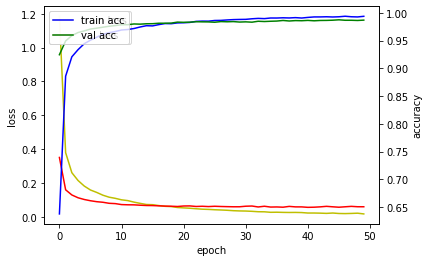

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

제출(batchnorm, dropout, relu, adam)

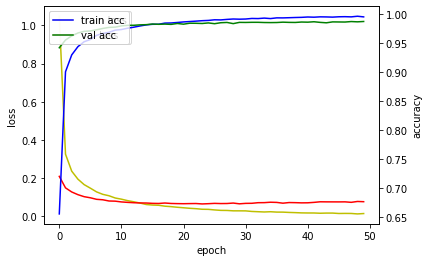

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

위에서 batch norm 빼고 다시 돌린 결과인데 성능이 위보다 안나왔다.

# 여기부터는 새로 모델 만들어보려다가 실패한 결과물입니다...

In [0]:
#create network

def flatten() :
  return tf.keras.layers.Flatten()

def dense(channel, weight_init) :
  return tf.keras.layers.Dense(units=channel, use_bias=True, kernel_initializer=weight_init)

def relu() :
  return tf.keras.layers.Activation(tf.keras.activations.relu)

def softmax() :
  return tf.keras.layers.Activation(tf.keras.activations.softmax)

def dropout(rate) :
  return tf.keras.layers.Dropout(rate)

def create_model(label_dim) :
  weight_init = tf.keras.initializers.he_uniform()

  model = tf.keras.Sequential()
  #model.add(flatten())

  for i in range(2):
    model.add(dense(256, weight_init))
    model.add(relu())
    model.add(dropout(rate=0.5))
  
  model.add(dense(label_dim, weight_init))
  model.add(softmax())

  return model




In [0]:
#define loss

def loss_fn(model, images, labels):
  logits = model(images, training=True)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=labels))
  return loss

def accuracy_fn(model, images, labels):
  logits = model(images, training=False)
  prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels,-1))
  accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
  return accuracy_fn

def grad(model, images, labels):
  with tf.GradientTape() as tape:
    loss = loss_fn(model, images, labels)
  return tape.gradient(loss, model.variables)



In [0]:
learning_rate = 0.0003
batch_size = 128

training_epochs = 1
training_iterations = len(x_train) // batch_size

label_dim = 10

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).\
shuffle(buffer_size=100000).\
prefetch(buffer_size = batch_size).\
batch(batch_size).\
repeat()


val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).\
shuffle(buffer_size=100000).\
prefetch(buffer_size = len(x_val)).\
batch(len(x_val)).\
repeat()


In [0]:
#dataset iterator
train_iterator = tf.compat.v1.data.make_one_shot_iterator(train_dataset)
val_iterator = tf.compat.v1.data.make_one_shot_iterator(val_dataset)

#model
network = create_model(label_dim)

#training
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

In [0]:
checkpoint = tf.train.Checkpoint(dnn=network)
global_step = tf.train.create_global_step()

for epoch in range(Start_epoch, training_epochs):
  for idx in range(start_iteration, training_iterations):
    train_input, train_label = train_iterator.get_next()

    grads = grad(network, train_input,train_label)
    optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables), global_step=global_step)

    train_loss = loss_fn(network, train_input, train_label)
    train_accuracy = accuracy_fn(network, train_input, train_label)

    test_input, test_label = val_iterator.get_next()
    test_accuracy = accuracy_fn(network,text_input,test_label)

    print("Epoch: [%2d] [%5d/%5d], train_loss: %.8f, train_accuracy: %.4f, val_accuracy: %.4f" \
          % (epoch, idx, training_iterations, train_loss, train_accuracy, test_accuracy))
    counter += 1

checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))